In [2]:
import matplotlib.pyplot as plt
import numpy as np

# Complexity

## Performance

Alex Gaynor: Fast Python, Slow Python - PyCon 2014 - [video](https://www.youtube.com/watch?v=7eeEf_rAJds)

Benchmarks are lies - impossible to reduce performance to a single number

Performance is about specialization
- specialize the algorithm for the use case
- specialize code to get it to run faster

## Complexity

[Ned Batchelder - Big-O: How Code Slows as Data Grows - PyCon 2018](https://www.youtube.com/watch?v=duvZ-2UK0fc)

- time complexity 
- algorithmic complexity
- asympotic complexity
(same thing)

**How code slows as data grows**
- estimated analytically
- measured directly (ideally!)

## Big $\mathcal{O}$(n) notation

$n$ = amount of data

$\mathcal{O}$ = order magnitude

- dimensionless - not the running time
- relationship between data & code speed - how does the code slow down as data gets larger
- if I give the code 10x the data - how much longer will it take?
- the $\mathcal{O}(n)$ refers to $n$ in the limit - an $n$ gets very large

(0, 100)

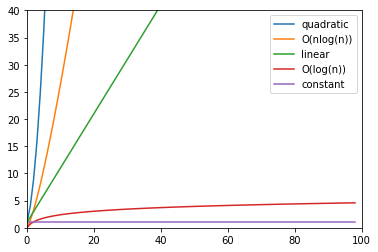

In [3]:
n = np.arange(1, 100)

f, a = plt.subplots()
plt.plot(np.power(n, 2), label='quadratic')
plt.plot(np.log(n) * n, label='O(nlog(n))')
plt.plot(n, label='linear')
plt.plot(np.log(n), label='O(log(n))')
plt.plot(np.ones_like(n), label='constant')

plt.legend()
plt.ylim(0, 40)
plt.xlim(0, 100)

Don't use fancy algo with small n 
- in the small n region they all look very similar

(0, 10)

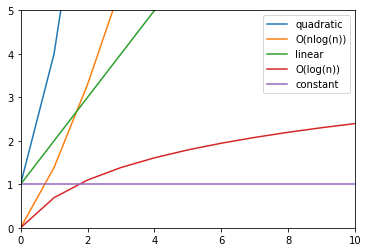

In [4]:
f, a = plt.subplots()
plt.plot(np.power(n, 2), label='quadratic')
plt.plot(np.log(n) * n, label='O(nlog(n))')
plt.plot(n, label='linear')
plt.plot(np.log(n), label='O(log(n))')
plt.plot(np.ones_like(n), label='constant')

plt.legend()
plt.ylim(0, 5)
plt.xlim(0, 10)

## How to determine Big-O

1. which piece of code
2. what is n (not the value, but the variable)
3. count steps in a typical run
4. keep the highest term (throw away lower order components)


## Don't look ahead!

For all the operations below - estimate the complexity
- length of list
- iterating over a list
- finding an element in a sorted list
- a nested for loop

## Constant time 

$\mathcal{O}(1)$

Example - finding the length of a Python list

In [18]:
small = list(np.random.rand(100))
large = list(np.random.rand(100000))

In [19]:
%timeit len(small)

52.3 ns ± 0.273 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


In [20]:
%timeit len(large)

62.8 ns ± 1.84 ns per loop (mean ± std. dev. of 7 runs, 10000000 loops each)


## Linear time

$\mathcal{O}(n)$ 

Example - iterating over a list

In [7]:
%timeit for item in small: pass

640 ns ± 5.11 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


In [8]:
%timeit for item in large: pass

6.69 µs ± 40.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


## Logarithmic time

$\mathcal{O}(log(n))$ 

Example = finding elements in a sorted list

Binary search cuts the length of the sorted list in half each time -> $\mathcal{O}(log(n))$

In [9]:
unsort_small = np.random.uniform(0, 100, 100)
unsort_large = np.random.uniform(0, 100, 1000)

In [10]:
def brute_force(data):
    query = np.random.choice(data)
    for i in data: 
        if i == query: 
            break

In [11]:
%timeit brute_force(unsort_small)

5.23 µs ± 68.4 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [12]:
%timeit brute_force(unsort_large)

33.2 µs ± 647 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [13]:
sort_small = sorted(unsort_small)
sort_large = sorted(unsort_large)

In [14]:
def divide_and_conquer(data):
    query = np.random.choice(data)
    split = int(len(data) / 2)
    while split:
        split = int(len(data) / 2)
        centre = data[split]

        if centre == query:
            return True

        if centre < query:
            data = data[split:]
        else:
            data = data[:split]

In [15]:
%timeit divide_and_conquer(sort_small)

10.7 µs ± 143 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [16]:
%timeit divide_and_conquer(sort_large)

63.3 µs ± 782 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


## Quadratic time

$\mathcal{O}(n^2)$ 

Example - nested for loops

## Practical

Demonstrate that a nested for loop is quadratic time

In [21]:
import hashlib
hash_object = hashlib.md5(b'Hello World')
print(hash_object.hexdigest())

b10a8db164e0754105b7a99be72e3fe5


## Practical

What is the complexity of the following in Python
- `list.append` $\mathcal{O}(1)$
- `val in list` $\mathcal{O}(n)$
- `dict[key]` $\mathcal{O}(1)$ - hashing
- `key in dict` $\mathcal{O}(1)$ - hashing
- `val in set` $\mathcal{O}(1)$ - hashing

## More

$\mathcal{O}(n3, n4, 2^n, n^n, n!)$

More dimensions

Typical versus worst case